# 라이브러리

In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
from konlpy.tag import Okt
import re
import matplotlib.pyplot as plt
from wordcloud import ImageColorGenerator

# 사용자 정의 함수

In [3]:
# 텍스트 전처리
def preprocessing(data):
    
    okt = Okt()
    new_data = re.sub(r'[^가-힣]', ' ', data)

    new_words = []
    for word, tag in okt.pos(new_data):
        if tag not in ['Josa', 'Suffix']:
            new_words.append(word)

    return new_words

# 데이터 로드

In [4]:
# 테스트 할 데이터
path = './노인감성대화.csv'
df = pd.read_csv(path, encoding='utf-8')
df['사람문장1']

0                  당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.
1            재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.
2                             빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.
3                                           이제 돈이라면 지긋지긋해.
4                                             친구 때문에 눈물 나.
                               ...                        
10145                      병원에서 친하게 지내던 환자가 암으로 죽어서 너무 슬퍼.
10146                        천식 때문에 가족들 두고 산에서 혼자 사는데 외롭네.
10147    오늘 식당에서 서빙을 하는데 젊은 청년들이 반말하길래 기분이 나빠 나도 반말을 하며...
10148              최 영감이 노인들에게 나를 이상한 사람으로 이야기해서 답답하고 억울해.
10149              이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.
Name: 사람문장1, Length: 10150, dtype: object

# 데이터 전처리

In [5]:
# 전처리
prepro_text = df['사람문장1'].map(preprocessing)
prepro_text

0             [당뇨, 합병증, 때문, 먹어야, 할, 약, 열, 가지, 넘어가니까, 스트레스]
1        [재, 취업, 돼서, 받게, 된, 첫, 월급, 온, 가족, 외식, 할, 예정, 너무...
2                     [빚, 드디어, 다, 갚게, 되어서, 이제야, 안도, 감, 들어]
3                                    [이제, 돈, 이, 라면, 지긋지긋해]
4                                          [친구, 때문, 눈물, 나]
                               ...                        
10145                   [병원, 친하게, 지내던, 환자, 암, 죽어서, 너무, 슬퍼]
10146                    [천식, 때문, 가족, 두고, 산, 혼자, 사는데, 외롭네]
10147    [오늘, 식당, 서빙, 하는데, 젊은, 청년, 반말, 하길래, 기분, 나빠, 나도,...
10148         [최, 영감, 노인, 나를, 이상한, 사람, 이야기, 해서, 답답하고, 억울해]
10149      [이렇게, 좋은, 운동, 시설, 경로, 우대, 운동, 할, 수, 있다니, 참, 행운]
Name: 사람문장1, Length: 10150, dtype: object

In [6]:
# 각 리스트 하나의 리스트로 바꾸기
text_list = []

for text in prepro_text:
    for word in text:
        text_list.append(word)
text_list

['당뇨',
 '합병증',
 '때문',
 '먹어야',
 '할',
 '약',
 '열',
 '가지',
 '넘어가니까',
 '스트레스',
 '재',
 '취업',
 '돼서',
 '받게',
 '된',
 '첫',
 '월급',
 '온',
 '가족',
 '외식',
 '할',
 '예정',
 '너무',
 '행복해',
 '빚',
 '드디어',
 '다',
 '갚게',
 '되어서',
 '이제야',
 '안도',
 '감',
 '들어',
 '이제',
 '돈',
 '이',
 '라면',
 '지긋지긋해',
 '친구',
 '때문',
 '눈물',
 '나',
 '새로',
 '간',
 '치과',
 '조금',
 '썩기만',
 '한',
 '이를',
 '임플란트',
 '하라',
 '했어',
 '과잉',
 '진료',
 '안',
 '한다더니',
 '남편',
 '죽기',
 '전',
 '손자',
 '얼굴',
 '보고',
 '싶다고',
 '했는데',
 '다행히',
 '늦지',
 '않아서',
 '안도',
 '했어',
 '내',
 '일',
 '할',
 '수',
 '있는',
 '자리',
 '점점',
 '줄어든다는',
 '걸',
 '생각',
 '하니',
 '너무',
 '속상해',
 '남편',
 '건강하게',
 '오랫동안',
 '살',
 '싶은데',
 '남편',
 '당뇨병',
 '걸렸다',
 '요즘',
 '아들',
 '말',
 '없이',
 '사업',
 '시작',
 '했나',
 '봐',
 '빨리',
 '정년',
 '퇴직',
 '공기',
 '좋은',
 '시골',
 '내려가서',
 '살',
 '싶어',
 '도시',
 '너무',
 '답답하고',
 '힘들어',
 '남편',
 '내',
 '돈',
 '들고',
 '집',
 '나갔어',
 '어떡하지',
 '난',
 '아주',
 '성실하게',
 '살아왔다고',
 '자신',
 '하지만',
 '주변',
 '남은',
 '이',
 '아무',
 '없어',
 '공허함에',
 '눈물',
 '나네',
 '이',
 '너무',
 '안',
 '좋은데',
 '틀니',
 '하기',
 '싫고',
 '임플란트',
 

# 기본 워드클라우드

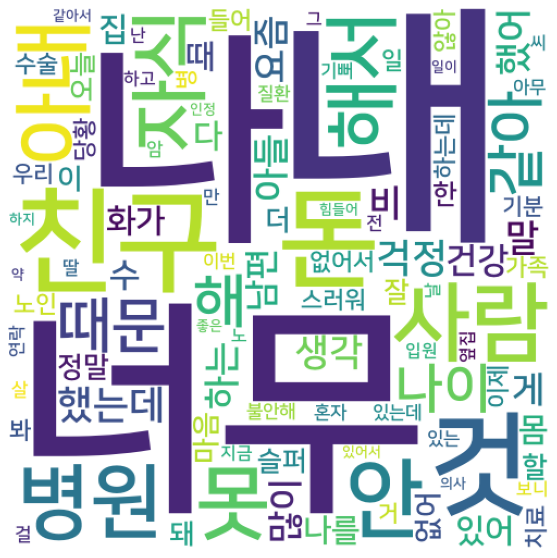

In [10]:
# 폰트
font_path = 'C:\\Users\\Hi\\Desktop\\Practice\\Text_analysis\\font\\NanumSquareB.otf'

# 기본적인 워드클라우드
wordcloud = WordCloud(
    font_path = font_path,
    width = 500,
    height = 500,
    background_color = 'white',
    max_words=100
)

# 빈도 추출
count = Counter(text_list)

# 워드 클라우드 (counter 빈도 객체 에서 뽑아내기)
wordcloud = wordcloud.generate_from_frequencies(count)

# 워드 클라우드 이미지 추출
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.to_image())
plt.axis('off')
plt.show()

# 이미지 수치화
array = np.array(wordcloud.to_image())

# 워드클라우드 이미지 적용

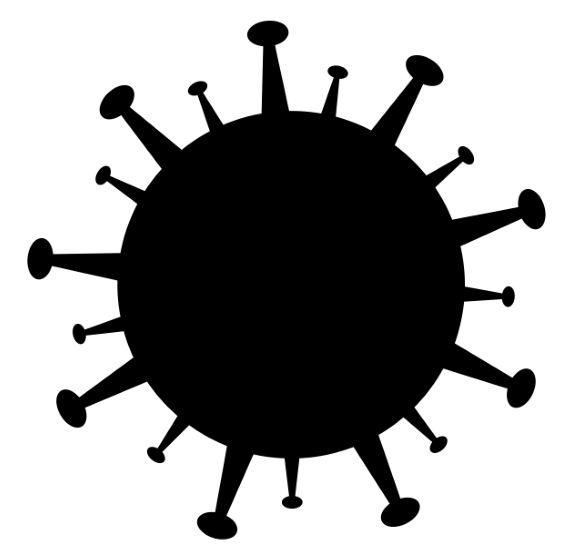

In [14]:
# 사용할 이미지
covid_img_path = 'C:\\Users\\Hi\\Desktop\\Practice\\Text_analysis\\covid.png'
covid_icon = Image.open(covid_img_path)

plt.figure(figsize=(10,10))
plt.imshow(covid_icon)
plt.axis('off')
plt.show()

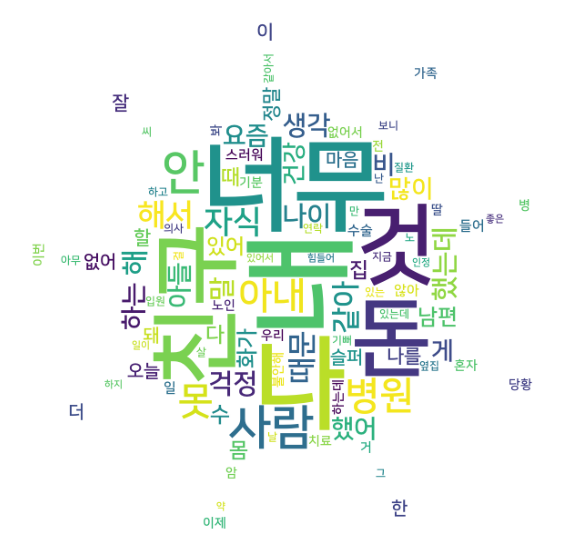

In [12]:
# 위 이미지 워드클라우드에 적용
covid_mask = Image.new('RGB', covid_icon.size, (255,255,255))
covid_mask.paste(covid_icon, covid_icon)
mask = np.array(covid_mask)

# 위 mask를 활용한 새로운 워드클라우드
new_wc = WordCloud(
    font_path = font_path,
    width = 500,
    height = 500,
    background_color = 'white',
    max_words=100,
    mask=mask
)

plt.figure(figsize=(10,10))
plt.imshow(new_wc.generate_from_frequencies(count).to_image())
plt.axis('off')
plt.show()
